In [1]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [2]:
# Where my json files are located
player_name = "Liam"
onlyfiles = [f for f in listdir(f"../{player_name}FaceitData/MatchStats") if isfile(join(f"../{player_name}FaceitData/MatchStats", f))]

In [3]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [4]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../{player_name}FaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [5]:
df_liam = create_df_from_json()

In [6]:
# Create picklle file if there are large amounts of json files
df_liam.to_pickle(f"{player_name}Stats.pkl", compression="bz2")

In [7]:
df_liam

,Mvps,Assists,GameMode,Winner,Score,Result,K/rRatio,MatchId,MatchRound,UpdatedAt,...,Kills,Team,FirstHalfScore,CreatedAt,PlayerId,Region,Deaths,FinalScore,Nickname,K/dRatio
0,6,9,5v5,36155a58-b3b8-4cb7-805a-5d6595f8aad3,17 / 19,1,0.64,1-9336c095-cc3f-46f8-9385-70d8324f528c,1,2023-09-19T19:09:38.697Z,...,23,Pirates Esports,8,2023-09-19T19:09:38.697Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,23,19,Zyrx,1
1,2,4,5v5,37a52f35-b451-4e8d-a80d-81d652331f0b,16 / 9,0,0.56,1-a284a78b-1508-478e-aac9-ff15d50b6610,1,2023-09-14T18:51:45.813Z,...,14,Pirates Esports,5,2023-09-14T18:51:45.813Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,19,9,Zyrx,0.74
2,3,13,5v5,abd4b1c1-45f1-4d26-abe8-df26a7f781c6,21 / 25,0,0.74,1-a159c2c4-1398-4983-a960-a2fcc07ef4ea,1,2023-09-12T19:27:34.971Z,...,34,Pirates Esports,4,2023-09-12T19:27:34.971Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,33,21,Zyrx,1.03
3,6,4,5v5,36155a58-b3b8-4cb7-805a-5d6595f8aad3,16 / 6,1,0.73,1-d60f3d51-acc3-47f4-903b-f0758eeaac38,1,2023-09-07T18:53:36.367Z,...,16,Pirates Esports,10,2023-09-07T18:53:36.367Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,14,16,Zyrx,1.14
4,1,6,5v5,efe2c0e5-58e7-4432-9651-23a928e010de,14 / 16,0,0.43,1-dc598f36-72c3-41c6-9fd6-623f2c4bff85,1,2023-09-05T19:07:00.784Z,...,13,Pirates Esports,3,2023-09-05T19:07:00.784Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,25,14,Zyrx,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1,5,5v5,1c0ee886-f009-4821-b12b-4d875104887d,16 / 9,1,0.68,dec75700-0743-40f7-95d5-bd69bcdd32be,1,2018-06-02T07:55:56.847Z,...,17,team_-Pantha-,9,2018-06-02T07:54:21.698Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,17,16,Zyrosuzu,1
969,7,8,5v5,449757d9-1e8c-4aff-939d-c847caa389f0,21 / 25,1,0.76,34f97bcb-0178-496c-a272-ed283656ffd3,1,2018-06-02T01:15:04.539Z,...,35,team_oCarenza,5,2018-06-02T01:13:28.452Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,33,25,Zyrosuzu,1.06
970,4,1,5v5,f4eb06b3-22b9-4670-8207-09f6e0205e27,8 / 16,0,1,568d0c6c-204d-4b55-bd64-e370662f94e1,1,2017-11-05T21:21:48.384Z,...,24,team_JamesAnt,7,2017-11-05T20:00:18.893Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,18,8,Zyrosuzu,1.33
971,7,4,5v5,dc1ad9cf-9b16-4705-ad07-96003ce5463d,13 / 16,0,0.79,c361a1cd-c751-4834-8150-1396cfc04f9f,1,2017-10-14T21:15:26.6Z,...,23,team_Zyrosuzu,2,2017-10-14T21:15:13.102Z,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,24,13,Zyrosuzu,0.96


In [9]:
#onlyfiles

In [9]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_liam = df_liam.astype(type, errors="ignore")
df_liam.dropna(how="any", inplace=True)
df_liam['Score'] = df_liam['Score'].str.replace(" / ", ":")
df_liam = df_liam
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


In [10]:
# Clean CreateAt Column

df_liam['CreatedAt'] = df_liam['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_liam= df_liam[df_liam['CreatedAt'].str.len() > 22]


In [11]:

df_liam['CreatedAt'] = df_liam['CreatedAt'].astype("datetime64[ns]")
df_liam["DateOrdinal"] = df_liam['CreatedAt'].apply(lambda x: x.toordinal())


df_liam["Year"] = df_liam['CreatedAt'].dt.year
df_liam["Month"] = df_liam['CreatedAt'].dt.month
df_liam["Date"] = df_liam['CreatedAt'].dt.day

In [13]:

rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_liam = df_liam.replace({"Map": rename_all_maps})
df_liam.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_liam = df_liam.groupby('Map').filter(lambda x: len(x)>3)


In [14]:
df_liam

,Mvps,Assists,GameMode,Winner,Score,Result,K/rRatio,MatchId,MatchRound,UpdatedAt,...,PlayerId,Region,Deaths,FinalScore,Nickname,K/dRatio,DateOrdinal,Year,Month,Date
972,4,2,5v5,7af6dd27-5147-4b32-89d3-5bb1d35511e0,16:12,1,0.75,0722158f-c742-443d-9d8b-d1aa6d2f7a81,1,2017-10-14T14:34:36.673Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,16,16,Zyrosuzu,1.31,736616,2017,10,14
971,7,4,5v5,dc1ad9cf-9b16-4705-ad07-96003ce5463d,13:16,0,0.79,c361a1cd-c751-4834-8150-1396cfc04f9f,1,2017-10-14T21:15:26.6Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,24,13,Zyrosuzu,0.96,736616,2017,10,14
970,4,1,5v5,f4eb06b3-22b9-4670-8207-09f6e0205e27,8:16,0,1.00,568d0c6c-204d-4b55-bd64-e370662f94e1,1,2017-11-05T21:21:48.384Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,18,8,Zyrosuzu,1.33,736638,2017,11,5
969,7,8,5v5,449757d9-1e8c-4aff-939d-c847caa389f0,21:25,1,0.76,34f97bcb-0178-496c-a272-ed283656ffd3,1,2018-06-02T01:15:04.539Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,33,25,Zyrosuzu,1.06,736847,2018,6,2
968,1,5,5v5,1c0ee886-f009-4821-b12b-4d875104887d,16:9,1,0.68,dec75700-0743-40f7-95d5-bd69bcdd32be,1,2018-06-02T07:55:56.847Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,17,16,Zyrosuzu,1.00,736847,2018,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1,6,5v5,efe2c0e5-58e7-4432-9651-23a928e010de,14:16,0,0.43,1-dc598f36-72c3-41c6-9fd6-623f2c4bff85,1,2023-09-05T19:07:00.784Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,25,14,Zyrx,0.52,738768,2023,9,5
3,6,4,5v5,36155a58-b3b8-4cb7-805a-5d6595f8aad3,16:6,1,0.73,1-d60f3d51-acc3-47f4-903b-f0758eeaac38,1,2023-09-07T18:53:36.367Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,14,16,Zyrx,1.14,738770,2023,9,7
2,3,13,5v5,abd4b1c1-45f1-4d26-abe8-df26a7f781c6,21:25,0,0.74,1-a159c2c4-1398-4983-a960-a2fcc07ef4ea,1,2023-09-12T19:27:34.971Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,33,21,Zyrx,1.03,738775,2023,9,12
1,2,4,5v5,37a52f35-b451-4e8d-a80d-81d652331f0b,16:9,0,0.56,1-a284a78b-1508-478e-aac9-ff15d50b6610,1,2023-09-14T18:51:45.813Z,...,8ed6f299-4b39-4f59-b979-ec19f8308e71,EU,19,9,Zyrx,0.74,738777,2023,9,14


In [15]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_liam = (
    df_liam.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\jaceh\AppData\Local\Temp\ipykernel_25188\1493145156.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_liam.groupby(by="Map").aggregate(


In [16]:
Maps_Stats_df_liam

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Ancient,40,693,163,822,85,6.150000,36.275000,16
Anubis,4,80,13,71,19,7.000000,39.000000,2
Cache,19,393,84,372,58,6.105263,29.157895,8
Dust2,32,664,113,596,116,8.125000,39.062500,17
Inferno,219,4161,911,4279,610,7.392694,38.849315,106
Mirage,209,4042,795,4072,613,7.645933,40.244019,106
Nuke,102,1945,404,1963,300,6.990196,37.117647,57
Overpass,113,2257,463,2134,349,6.920354,34.300885,75
Train,36,763,169,700,129,8.111111,38.694444,19


In [17]:
Maps_Stats_df_liam["Losses"] = (Maps_Stats_df_liam["Matches"] - Maps_Stats_df_liam["Wins"]).astype(int)
Maps_Stats_df_liam["Winrate%"] = (((Maps_Stats_df_liam["Wins"] / Maps_Stats_df_liam["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_liam["Headshots"] = (Maps_Stats_df_liam["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_liam["Headshots%"] = (Maps_Stats_df_liam["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_liam["Matches"].astype(int)
Maps_Stats_df_liam.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_liam

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Inferno,219,4161,911,4279,610,7.39,38.85,106,113,48.40
Mirage,209,4042,795,4072,613,7.65,40.24,106,103,50.72
Overpass,113,2257,463,2134,349,6.92,34.30,75,38,66.37
Nuke,102,1945,404,1963,300,6.99,37.12,57,45,55.88
Vertigo,87,1738,396,1706,285,7.64,38.49,52,35,59.77
Ancient,40,693,163,822,85,6.15,36.27,16,24,40.00
Train,36,763,169,700,129,8.11,38.69,19,17,52.78
Dust2,32,664,113,596,116,8.12,39.06,17,15,53.12
Cache,19,393,84,372,58,6.11,29.16,8,11,42.11


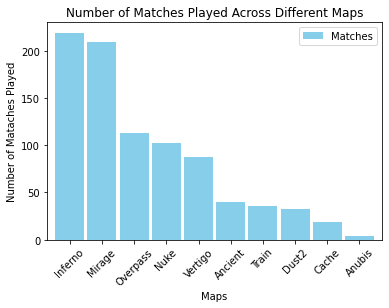

In [18]:

#Number of matches played across different maps
Maps_Stats_df_liam.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.show()
